# Pandas

This notebook will dicuss the relationship between an individuals major league baseball player's Wins Above Replacement, or WAR, and the winning percentage,season outcome and Win Probability Added to the team played on.

`imports`, you've seen this before!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import openpyxl
import xlrd
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [6]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


The null hypothesis of this report will be there that an individual’s ability to accumulate high WAR in a season will have little impact on the winning percentage of their team (1). Thereby, a player with a low WAR season has the same impact (2).

In [7]:
from sympy import symbols, Eq

# Define the symbols
mu1, mu2 = symbols('mu1 mu2')

# Define the null hypothesis equations
H0_1 = Eq(mu1, mu2)
H0_2 = Eq(mu1 - mu2, 0)

# Display the equations
print("H0: ", H0_1)
print("or")
print("H0: ", H0_2)


H0:  Eq(mu1, mu2)
or
H0:  Eq(mu1 - mu2, 0)


The alternative hypothesis is that the higher or lower WAR gathered by a player will positively or negatively impact their team’s ability to win respectively:

In [8]:
from sympy import symbols, Ne

# Define the symbols
mu1, mu2 = symbols('mu1 mu2')

# Define the alternative hypothesis equations
HA_1 = Ne(mu1, mu2)
HA_2 = Ne(mu1 - mu2, 0)

# Display the equations
print("H_A: ", HA_1)
print("or")
print("H_A: ", HA_2)


H_A:  Ne(mu1, mu2)
or
H_A:  Ne(mu1 - mu2, 0)


The second null hypothesis this report will cover is the relationship between a player’s WAR, and the Win Probability Added (WPA) they accumulate over a season. It will follow the same (H0) and (HA) previously stated. 

In [9]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [10]:
import os
import pandas as pd
import requests

# Check if the file exists locally
if os.path.isfile("WAR_history.csv"):
    filepath = "WAR_history.csv"
    print("Loading from file")
    try:
        War_history = pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        War_history = pd.read_csv(filepath, encoding='latin1')
else:
    filepath = "https://www.baseball-reference.com/leaders/WAR_progress.shtml"
    print("Loading from the internet")
    
    # Use requests to fetch the data
    response = requests.get(filepath)
    if response.status_code == 200:
        # Parse the HTML content using pandas
        try:
            War_history = pd.read_html(response.text)[0]
            
            # Save the data to a CSV file for future use
            War_history.to_csv("WAR_history.csv", index=False, encoding='utf-8')
        except ValueError:
            print("Failed to parse HTML content")
            War_history = None
    else:
        print("Failed to retrieve data from the internet")
        War_history = None

if War_history is not None:
    print("Done")
else:
    print("Data not available")



Loading from file
Done


In [11]:
if os.path.isfile("WPA_2023"):
    filepath = "WPA_2023.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")

WPA_2023 = pd.read_csv(filepath)
print("done")

loading from the internet


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

Leading War players each year

In [ ]:
if os.path.isfile("WAR_history.csv"):
    filepath = "WAR_history.csv"
    print("Loading from file")
    try:
        War_history = pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        War_history = pd.read_csv(filepath, encoding='latin1')
else:
    filepath = "https://www.baseball-reference.com/leaders/WAR_progress.shtml"
    print("Loading from the internet")
    
    # Use requests to fetch the data
    response = requests.get(filepath)
    if response.status_code == 200:
        # Parse the HTML content using pandas
        try:
            War_history = pd.read_html(response.text)[0]
            
            # Save the data to a CSV file for future use
            War_history.to_csv("WAR_history.csv", index=False, encoding='utf-8')
        except ValueError:
            print("Failed to parse HTML content")
            War_history = None
    else:
        print("Failed to retrieve data from the internet")
        War_history = None

if War_history is not None:
    print("Done")
else:
    print("Data not available")

In [ ]:
War_history.sample(50)
columns_11_and_12 = War_history.iloc[:, [0,10, 11]]
print(columns_11_and_12)

In [ ]:
import pandas as pd

# URL of the webpage containing the table
base_url = 'https://www.baseball-reference.com/leagues/majors/2023-value-batting.shtml'

wpa_data_read = pd.read_html(base_url)

wpa_dataframe = wpa_data_read[0]

wpa_dataframe.head()

top 50 historical War leaders by year. could argue due to other factours but probly pointless

In [ ]:
War_history = pd.read_csv(filepath, encoding='latin1')

# Extract column 12 (index 11) and convert to numeric, ignoring errors
column_12 = pd.to_numeric(War_history.iloc[:, 11], errors='coerce')

# Get indices of the top 50 highest numbers from column 12
indices_top_50 = column_12.dropna().nlargest(50).index

# Select the rows from the original DataFrame using the indices, and include columns 1, 11, and 12
result = War_history.loc[indices_top_50, ['Column1', 'Column11', 'Column12']]

result


In [ ]:

# Convert column 1 (Year) and column 12 (WAR) to numeric, ignoring errors
War_history['Year'] = pd.to_numeric(War_history.iloc[:, 0], errors='coerce')
War_history['WAR'] = pd.to_numeric(War_history.iloc[:, 11], errors='coerce')

# Remove rows for the year 2024
filtered_data = War_history[(War_history['Year'] != 2024) & War_history['Year'].notna()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Year'], filtered_data['WAR'], marker='o', linestyle='-')
plt.title('Year vs. WAR')
plt.xlabel('Year')
plt.ylabel('WAR')
plt.grid(True)
plt.show()

data from 1994 to now is most accurate as they introduced wild card for the post season, probly need to consider 2020 as an outlire due to covid and less games

In [ ]:
# Ensure 'Column12' is present and is numeric
if 'Column12' in War_history.columns:
    # Convert 'Column12' to numeric, forcing any errors to NaN
    War_history['Column12'] = pd.to_numeric(War_history['Column12'], errors='coerce')

    # Check for missing values
    missing_values_col12 = War_history['Column12'].isnull().sum()
    print(f"Missing values in 'Column12': {missing_values_col12}")

    # Drop missing values
    wpa_values = War_history['Column12'].dropna()

    # Calculate statistics for WPA/162 Games
    wpa_stats = {
        'Sample Mean': wpa_values.mean(),
        'Sample Median': np.median(wpa_values),
        'Sample Variance': np.var(wpa_values, ddof=1),
        'Sample Standard Deviation': np.std(wpa_values, ddof=1)
    }

    # Output the statistics for WPA
    print("\nWPA/162 Games Statistics:")
    print(wpa_stats)
else:
    print("'Column12' not found in the dataset.")


In [ ]:
# Convert column 1 (Year) to numeric, ignoring errors
War_history['Year'] = pd.to_numeric(War_history.iloc[:, 0], errors='coerce')

# Filter data for the years 1994 to 2023
filtered_data = War_history[(War_history['Year'] >= 1994) & (War_history['Year'] <= 2023)]

# Select columns 1, 11, and 12
selected_columns = filtered_data.iloc[:, [0, 10, 11]]

selected_columns

In [ ]:


import pandas as pd
import numpy as np

# Load the CSV file
file_path = "WAR_history.csv"  # Replace with your actual file path

try:
    data = pd.read_csv(file_path)
    print("CSV file loaded successfully.")
except Exception as e:
    print(f"Error loading CSV file: {e}")
    data = None

if data is not None:
    # Display the first few rows to verify the structure
    print("First few rows of the dataset:")
    print(data.head())

    # Function to clean and convert a column to numeric values, ignoring non-numeric entries
    def clean_and_convert(column):
        return pd.to_numeric(column, errors='coerce').dropna()

    # Extract and clean the relevant column for WPA/162 Games (Column12)
    if 'Column12' in data.columns:
        wpa_data = clean_and_convert(data['Column12'])

        # Calculate statistics for WPA/162 Games
        wpa_stats = {
            'Sample Mean': wpa_data.mean(),
            'Sample Median': np.median(wpa_data),
            'Sample Variance': np.var(wpa_data, ddof=1),
            'Sample Standard Deviation': np.std(wpa_data, ddof=1)
        }

        # Output the statistics for WPA
        print("WPA/162 Games Statistics:")
        print(wpa_stats)
    else:
        print("Column12 not found in the data.")
else:
    print("Data is not defined.")


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [ ]:
import os
import pandas as pd
import requests

filepath = "WAR_2023.csv"

if os.path.isfile(filepath):
    print("Loading from file")
    try:
        war_data = pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        war_data = pd.read_csv(filepath, encoding='latin1')
else:
    url = "https://www.baseball-reference.com/leagues/majors/2023-value-batting.shtml"
    print("Loading from the internet")
    
    # Use requests to fetch the data
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML content using pandas
        try:
            war_data = pd.read_html(response.text)[0]
            
            # Save the data to a CSV file for future use
            war_data.to_csv(filepath, index=False, encoding='utf-8')
        except ValueError:
            print("Failed to parse HTML content")
            war_data = None
    else:
        print("Failed to retrieve data from the internet")
        war_data = None

if war_data is not None:
    print("Data loaded successfully")
    # Display the first few rows of the dataframe
    print(war_data.head())
else:
    print("Data not available")



In [ ]:
import pandas as pd
import os

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Print the result
    print(top_50_values)

    # Optionally, you can save the result to a new CSV file
    top_50_values.to_csv('top_50_values.csv', index=False)
    print("Top 50 values saved to 'top_50_values.csv'")
except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


In [ ]:
import pandas as pd
import os

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the lowest 50 values
    lowest_50_values = column_16.nsmallest(50)

    # Print the result
    print(lowest_50_values)

    # Optionally, you can save the result to a new CSV file
    lowest_50_values.to_csv('lowest_50_values.csv', index=False)
    print("Lowest 50 values saved to 'lowest_50_values.csv'")
except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


In [ ]:
import pandas as pd
import os

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Compute statistics
    sample_mean = top_50_values.mean()
    sample_median = top_50_values.median()
    sample_variance = top_50_values.var()
    sample_std_dev = top_50_values.std()

    # Print the results
    print("Sample Mean:", sample_mean)
    print("Sample Median:", sample_median)
    print("Sample Variance:", sample_variance)
    print("Sample Standard Deviation:", sample_std_dev)

    # Optionally, you can save the top 50 values and their statistics to a new CSV file
    top_50_values.to_csv('top_50_values.csv', index=False)
    stats_df = pd.DataFrame({
        'Sample Mean': [sample_mean],
        'Sample Median': [sample_median],
        'Sample Variance': [sample_variance],
        'Sample Standard Deviation': [sample_std_dev]
    })
    stats_df.to_csv('top_50_stats.csv', index=False)
    print("Top 50 values saved to 'top_50_values.csv'")
    print("Statistics saved to 'top_50_stats.csv'")
except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


In [ ]:
import pandas as pd
import os

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Compute statistics
    sample_mean = bottom_50_values.mean()
    sample_median = bottom_50_values.median()
    sample_variance = bottom_50_values.var()
    sample_std_dev = bottom_50_values.std()

    # Print the results
    print("Sample Mean:", sample_mean)
    print("Sample Median:", sample_median)
    print("Sample Variance:", sample_variance)
    print("Sample Standard Deviation:", sample_std_dev)

    # Optionally, you can save the bottom 50 values and their statistics to a new CSV file
    bottom_50_values.to_csv('bottom_50_values.csv', index=False)
    stats_df = pd.DataFrame({
        'Sample Mean': [sample_mean],
        'Sample Median': [sample_median],
        'Sample Variance': [sample_variance],
        'Sample Standard Deviation': [sample_std_dev]
    })
    stats_df.to_csv('bottom_50_stats.csv', index=False)
    print("Bottom 50 values saved to 'bottom_50_values.csv'")
    print("Statistics saved to 'bottom_50_stats.csv'")
except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


Top 50 Values:
Sample Mean: 5.09
Sample Median: 4.9
Sample Variance: 1.2356122448979592
Sample Standard Deviation: 1.1115809664158338
Bottom 50 Values:
Sample Mean: -1.022
Sample Median: -0.9
Sample Variance: 0.11930204081632655
Sample Standard Deviation: 0.3454012750647087
Top 50 values saved to 'top_50_values.csv'
Bottom 50 values saved to 'bottom_50_values.csv'
Statistics saved to 'top_50_stats.csv' and 'bottom_50_stats.csv'


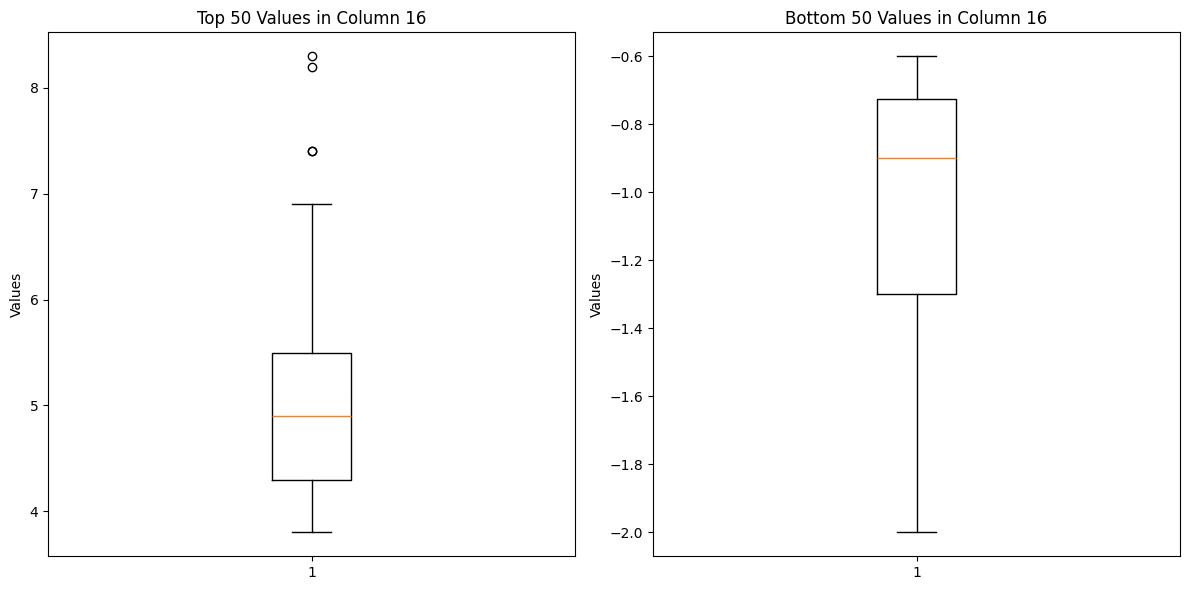

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Compute statistics for top 50 values
    top_50_mean = top_50_values.mean()
    top_50_median = top_50_values.median()
    top_50_variance = top_50_values.var()
    top_50_std_dev = top_50_values.std()

    # Compute statistics for bottom 50 values
    bottom_50_mean = bottom_50_values.mean()
    bottom_50_median = bottom_50_values.median()
    bottom_50_variance = bottom_50_values.var()
    bottom_50_std_dev = bottom_50_values.std()

    # Print the results for top 50 values
    print("Top 50 Values:")
    print("Sample Mean:", top_50_mean)
    print("Sample Median:", top_50_median)
    print("Sample Variance:", top_50_variance)
    print("Sample Standard Deviation:", top_50_std_dev)

    # Print the results for bottom 50 values
    print("Bottom 50 Values:")
    print("Sample Mean:", bottom_50_mean)
    print("Sample Median:", bottom_50_median)
    print("Sample Variance:", bottom_50_variance)
    print("Sample Standard Deviation:", bottom_50_std_dev)

    # Optionally, you can save the top 50 values and their statistics to a new CSV file
    top_50_values.to_csv('top_50_values.csv', index=False)
    bottom_50_values.to_csv('bottom_50_values.csv', index=False)
    top_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [top_50_mean, top_50_median, top_50_variance, top_50_std_dev]
    })
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [bottom_50_mean, bottom_50_median, bottom_50_variance, bottom_50_std_dev]
    })
    top_50_stats_df.to_csv('top_50_stats.csv', index=False)
    bottom_50_stats_df.to_csv('bottom_50_stats.csv', index=False)
    print("Top 50 values saved to 'top_50_values.csv'")
    print("Bottom 50 values saved to 'bottom_50_values.csv'")
    print("Statistics saved to 'top_50_stats.csv' and 'bottom_50_stats.csv'")

    # Create box plots
    plt.figure(figsize=(12, 6))

    # Box plot for top 50 values
    plt.subplot(1, 2, 1)
    plt.boxplot(top_50_values)
    plt.title('Top 50 Values in Column 16')
    plt.ylabel('Values')

    # Box plot for bottom 50 values
    plt.subplot(1, 2, 2)
    plt.boxplot(bottom_50_values)
    plt.title('Bottom 50 Values in Column 16')
    plt.ylabel('Values')

    # Show the box plots
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


In [14]:
import pandas as pd
import os

# Define the path to your CSV file
csv_file_path = 'WPA_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 9 columns
if df.shape[1] < 9:
    raise ValueError("The CSV file does not have at least 9 columns.")

try:
    # Extract the 9th column (index 8, since indexing starts from 0)
    column_9 = df.iloc[:, 8]

    # Ensure the column contains numeric values
    column_9 = pd.to_numeric(column_9, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_9 = column_9.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_9.nlargest(50)

    # Compute statistics
    sample_mean = top_50_values.mean()
    sample_median = top_50_values.median()
    sample_variance = top_50_values.var()
    sample_std_dev = top_50_values.std()

    # Print the results
    print("Sample Mean:", sample_mean)
    print("Sample Median:", sample_median)
    print("Sample Variance:", sample_variance)
    print("Sample Standard Deviation:", sample_std_dev)

    # Optionally, you can save the top 50 values and their statistics to a new CSV file
    top_50_values.to_csv('top_50_values_column_9.csv', index=False)
    stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [sample_mean, sample_median, sample_variance, sample_std_dev]
    })
    stats_df.to_csv('top_50_stats_column_9.csv', index=False)
    print("Top 50 values saved to 'top_50_values_column_9.csv'")
    print("Statistics saved to 'top_50_stats_column_9.csv'")
except Exception as e:
    raise ValueError(f"Error processing the 9th column: {e}")


Sample Mean: 2.846
Sample Median: 2.3
Sample Variance: 1.5813102040816327
Sample Standard Deviation: 1.2575015721984735
Top 50 values saved to 'top_50_values_column_9.csv'
Statistics saved to 'top_50_stats_column_9.csv'


In [13]:
import pandas as pd
import os

# Define the path to your CSV file
csv_file_path = 'WPA_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 9 columns
if df.shape[1] < 9:
    raise ValueError("The CSV file does not have at least 9 columns.")

try:
    # Extract the 9th column (index 8, since indexing starts from 0)
    column_9 = df.iloc[:, 8]

    # Ensure the column contains numeric values
    column_9 = pd.to_numeric(column_9, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_9 = column_9.dropna()

    # Sort the column in ascending order and select the lowest 50 values
    bottom_50_values = column_9.nsmallest(50)

    # Compute statistics
    sample_mean = bottom_50_values.mean()
    sample_median = bottom_50_values.median()
    sample_variance = bottom_50_values.var()
    sample_std_dev = bottom_50_values.std()

    # Print the results
    print("Sample Mean:", sample_mean)
    print("Sample Median:", sample_median)
    print("Sample Variance:", sample_variance)
    print("Sample Standard Deviation:", sample_std_dev)

    # Optionally, you can save the lowest 50 values and their statistics to a new CSV file
    bottom_50_values.to_csv('bottom_50_values_column_9.csv', index=False)
    stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [sample_mean, sample_median, sample_variance, sample_std_dev]
    })
    stats_df.to_csv('bottom_50_stats_column_9.csv', index=False)
    print("Bottom 50 values saved to 'bottom_50_values_column_9.csv'")
    print("Statistics saved to 'bottom_50_stats_column_9.csv'")
except Exception as e:
    raise ValueError(f"Error processing the 9th column: {e}")


Sample Mean: -2.0759999999999996
Sample Median: -1.8
Sample Variance: 0.30390204081632644
Sample Standard Deviation: 0.5512731090995882
Bottom 50 values saved to 'bottom_50_values_column_9.csv'
Statistics saved to 'bottom_50_stats_column_9.csv'


Top 50 Values:
Sample Mean: 2.846
Sample Median: 2.3
Sample Variance: 1.5813102040816327
Sample Standard Deviation: 1.2575015721984735
Bottom 50 Values:
Sample Mean: -2.0759999999999996
Sample Median: -1.8
Sample Variance: 0.30390204081632644
Sample Standard Deviation: 0.5512731090995882
Top 50 values saved to 'top_50_values_column_9.csv'
Bottom 50 values saved to 'bottom_50_values_column_9.csv'
Statistics saved to 'top_50_stats_column_9.csv' and 'bottom_50_stats_column_9.csv'


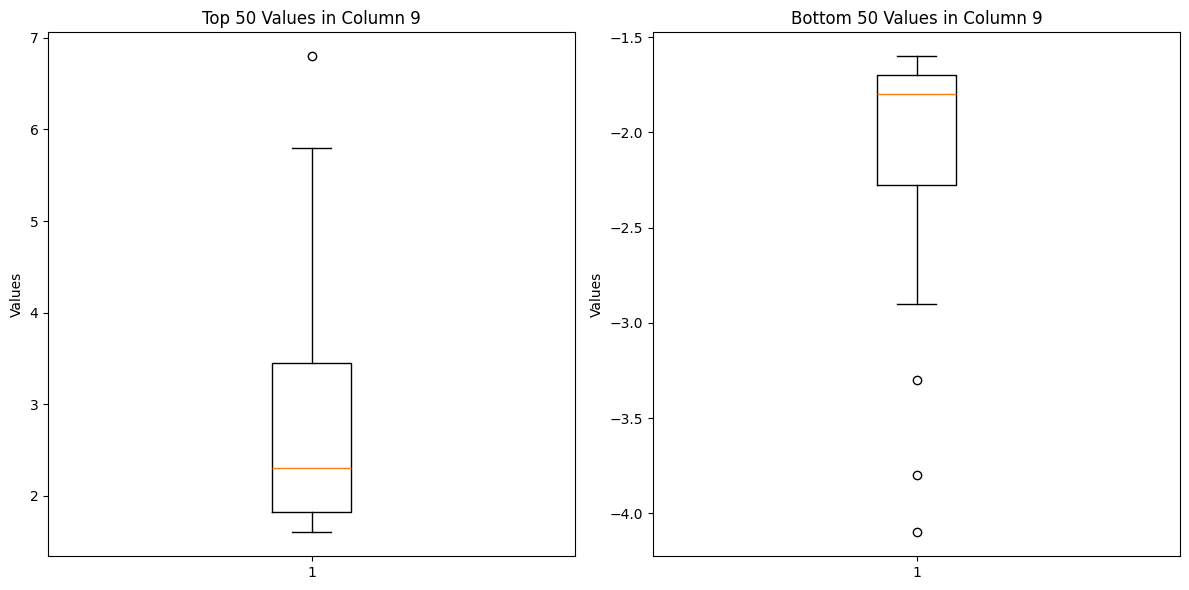

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WPA_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 9 columns
if df.shape[1] < 9:
    raise ValueError("The CSV file does not have at least 9 columns.")

try:
    # Extract the 9th column (index 8, since indexing starts from 0)
    column_9 = df.iloc[:, 8]

    # Ensure the column contains numeric values
    column_9 = pd.to_numeric(column_9, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_9 = column_9.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_9.nlargest(50)

    # Sort the column in ascending order and select the lowest 50 values
    bottom_50_values = column_9.nsmallest(50)

    # Compute statistics for top 50 values
    top_50_mean = top_50_values.mean()
    top_50_median = top_50_values.median()
    top_50_variance = top_50_values.var()
    top_50_std_dev = top_50_values.std()

    # Compute statistics for bottom 50 values
    bottom_50_mean = bottom_50_values.mean()
    bottom_50_median = bottom_50_values.median()
    bottom_50_variance = bottom_50_values.var()
    bottom_50_std_dev = bottom_50_values.std()

    # Print the results for top 50 values
    print("Top 50 Values:")
    print("Sample Mean:", top_50_mean)
    print("Sample Median:", top_50_median)
    print("Sample Variance:", top_50_variance)
    print("Sample Standard Deviation:", top_50_std_dev)

    # Print the results for bottom 50 values
    print("Bottom 50 Values:")
    print("Sample Mean:", bottom_50_mean)
    print("Sample Median:", bottom_50_median)
    print("Sample Variance:", bottom_50_variance)
    print("Sample Standard Deviation:", bottom_50_std_dev)

    # Optionally, you can save the top 50 values and their statistics to a new CSV file
    top_50_values.to_csv('top_50_values_column_9.csv', index=False)
    bottom_50_values.to_csv('bottom_50_values_column_9.csv', index=False)
    top_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [top_50_mean, top_50_median, top_50_variance, top_50_std_dev]
    })
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [bottom_50_mean, bottom_50_median, bottom_50_variance, bottom_50_std_dev]
    })
    top_50_stats_df.to_csv('top_50_stats_column_9.csv', index=False)
    bottom_50_stats_df.to_csv('bottom_50_stats_column_9.csv', index=False)
    print("Top 50 values saved to 'top_50_values_column_9.csv'")
    print("Bottom 50 values saved to 'bottom_50_values_column_9.csv'")
    print("Statistics saved to 'top_50_stats_column_9.csv' and 'bottom_50_stats_column_9.csv'")

    # Create box plots
    plt.figure(figsize=(12, 6))

    # Box plot for top 50 values
    plt.subplot(1, 2, 1)
    plt.boxplot(top_50_values)
    plt.title('Top 50 Values in Column 9')
    plt.ylabel('Values')

    # Box plot for bottom 50 values
    plt.subplot(1, 2, 2)
    plt.boxplot(bottom_50_values)
    plt.title('Bottom 50 Values in Column 9')
    plt.ylabel('Values')

    # Show the box plots
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 9th column: {e}")


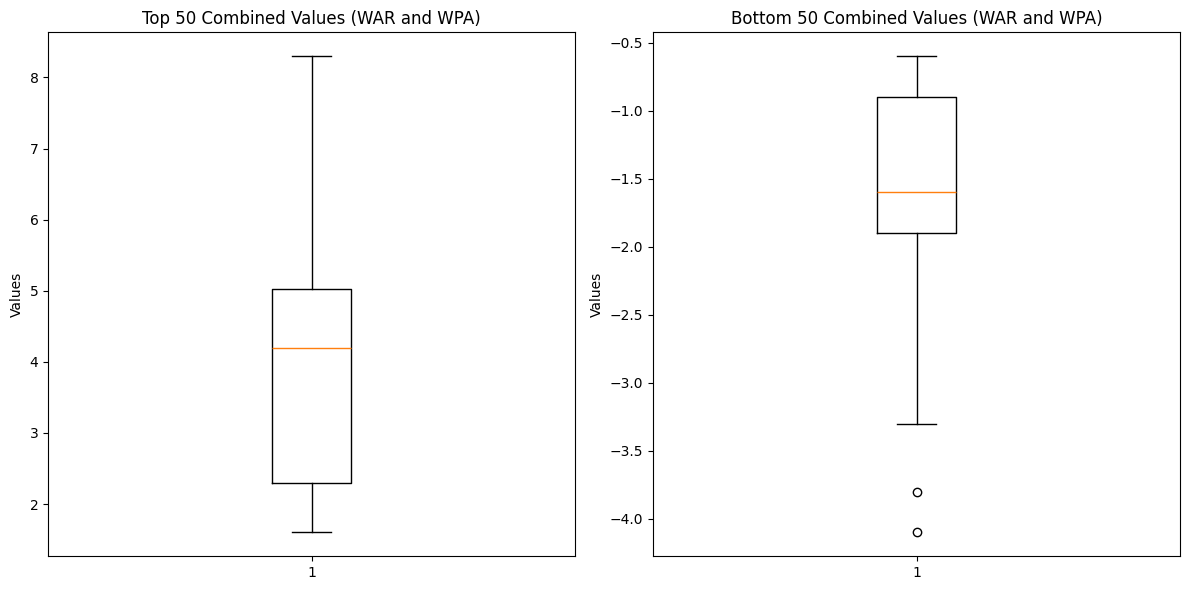

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the paths to your CSV files
war_csv_file_path = 'WAR_2023.csv'
wpa_csv_file_path = 'WPA_2023.csv'

# Function to read CSV file with multiple encoding options
def read_csv_with_encodings(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='latin1')
        except UnicodeDecodeError:
            return pd.read_csv(file_path, encoding='iso-8859-1')

# Check if the files exist
if not os.path.exists(war_csv_file_path):
    raise FileNotFoundError(f"The file '{war_csv_file_path}' does not exist.")
if not os.path.exists(wpa_csv_file_path):
    raise FileNotFoundError(f"The file '{wpa_csv_file_path}' does not exist.")

try:
    # Read the CSV files
    war_df = read_csv_with_encodings(war_csv_file_path)
    wpa_df = read_csv_with_encodings(wpa_csv_file_path)
except Exception as e:
    raise ValueError(f"Error reading the CSV files: {e}")

# Ensure the CSV files have at least 16 and 9 columns respectively
if war_df.shape[1] < 16:
    raise ValueError("The 'WAR_2023.csv' file does not have at least 16 columns.")
if wpa_df.shape[1] < 9:
    raise ValueError("The 'WPA_2023.csv' file does not have at least 9 columns.")

try:
    # Extract the 16th column from WAR_2023.csv and 9th column from WPA_2023.csv
    war_column_16 = war_df.iloc[:, 15]
    wpa_column_9 = wpa_df.iloc[:, 8]

    # Ensure the columns contain numeric values
    war_column_16 = pd.to_numeric(war_column_16, errors='coerce').dropna()
    wpa_column_9 = pd.to_numeric(wpa_column_9, errors='coerce').dropna()

    # Sort the columns and select the top 50 and bottom 50 values
    war_top_50_values = war_column_16.nlargest(50)
    war_bottom_50_values = war_column_16.nsmallest(50)
    wpa_top_50_values = wpa_column_9.nlargest(50)
    wpa_bottom_50_values = wpa_column_9.nsmallest(50)

    # Combine the top 50 and bottom 50 values from both datasets
    combined_top_50_values = pd.concat([war_top_50_values, wpa_top_50_values], ignore_index=True)
    combined_bottom_50_values = pd.concat([war_bottom_50_values, wpa_bottom_50_values], ignore_index=True)

    # Create box plots
    plt.figure(figsize=(12, 6))

    # Box plot for combined top 50 values
    plt.subplot(1, 2, 1)
    plt.boxplot(combined_top_50_values)
    plt.title('Top 50 Combined Values (WAR and WPA)')
    plt.ylabel('Values')

    # Box plot for combined bottom 50 values
    plt.subplot(1, 2, 2)
    plt.boxplot(combined_bottom_50_values)
    plt.title('Bottom 50 Combined Values (WAR and WPA)')
    plt.ylabel('Values')

    # Show the box plots
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the columns: {e}")


Columns in CSV: ['Rk', 'Name', 'Age', 'Tm', 'G', 'PA', 'Rbat', 'Rbaser', 'Rdp', 'Rfield', 'Rpos', 'RAA', 'WAA', 'Rrep', 'RAR', 'WAR', 'waaWL%', '162WL%', 'oWAR', 'dWAR', 'oRAR', 'Salary', 'Acquired', 'Pos\xa0Summary', 'Name-additional']
Top 50 WAR values: 68     8.3
3      8.2
502    7.4
617    7.4
614    6.9
227    6.5
299    6.2
379    6.0
499    6.0
565    5.9
352    5.8
224    5.5
644    5.5
671    5.5
119    5.4
700    5.4
249    5.3
576    5.3
182    5.2
153    5.1
313    5.1
552    5.1
570    5.0
36     4.9
69     4.9
82     4.9
406    4.9
668    4.8
13     4.7
23     4.6
336    4.5
60     4.4
75     4.4
133    4.4
754    4.4
335    4.3
466    4.3
596    4.3
658    4.3
238    4.2
515    4.2
635    4.1
291    4.0
351    3.9
474    3.9
490    3.9
710    3.9
144    3.8
231    3.8
520    3.8
Name: WAR, dtype: float64
Top 50 Win Percentage values: 68     0.539
3      0.538
502    0.532
617    0.531
614    0.532
227    0.527
299    0.525
379    0.524
499    0.528
565    0.523
352    0

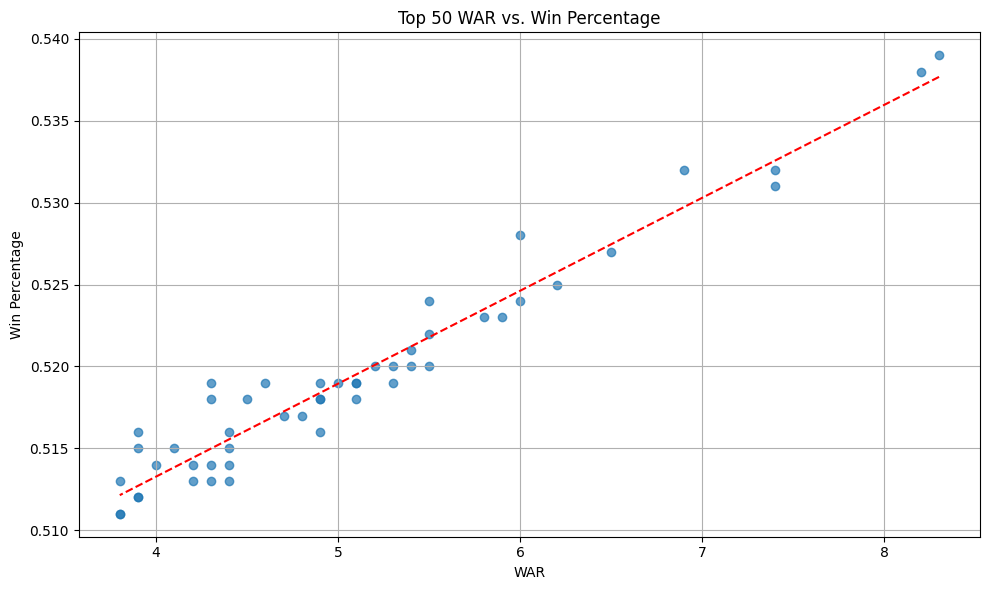

Top 50 WAR Winning Percentage Stats:
Mean: 0.51946
Median: 0.5185
Variance: 4.225346938775518e-05
Standard Deviation: 0.006500266870502717


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

# Function to read CSV file with multiple encoding options
def read_csv_with_encodings(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='latin1')
        except UnicodeDecodeError:
            return pd.read_csv(file_path, encoding='iso-8859-1')

try:
    # Read the CSV file
    df = read_csv_with_encodings(csv_file_path)
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Print column names for debug purposes
print(f"Columns in CSV: {df.columns.tolist()}")

# Ensure the CSV file has at least 16 and 18 columns respectively
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (WAR) and 18th column (Win_Percentage)
    war_column_16 = df.iloc[:, 15]
    win_percentage_column_18 = df.iloc[:, 17]

    # Ensure the columns contain numeric values
    war_column_16 = pd.to_numeric(war_column_16, errors='coerce')
    win_percentage_column_18 = pd.to_numeric(win_percentage_column_18, errors='coerce')

    # Drop rows where either WAR or Win_Percentage is NaN
    combined_df = pd.DataFrame({
        'WAR': war_column_16,
        'Win_Percentage': win_percentage_column_18
    }).dropna()

    # Sort WAR column in descending order and get the indices of the top 50 values
    top_50_indices = combined_df['WAR'].nlargest(50).index

    # Get the corresponding win percentages for these top 50 WAR values
    top_50_war = combined_df.loc[top_50_indices, 'WAR']
    top_50_win_percentage = combined_df.loc[top_50_indices, 'Win_Percentage']

    # Print samples of the top 50 WAR and win percentages for debug purposes
    print(f"Top 50 WAR values: {top_50_war}")
    print(f"Top 50 Win Percentage values: {top_50_win_percentage}")

    # Create a scatter plot to visualize the relationship between top 50 WAR and Win_Percentage
    plt.figure(figsize=(10, 6))
    plt.scatter(top_50_war, top_50_win_percentage, alpha=0.7)
    plt.title('Top 50 WAR vs. Win Percentage')
    plt.xlabel('WAR')
    plt.ylabel('Win Percentage')
    plt.grid(True)

    # Optionally, fit a regression line
    z = np.polyfit(top_50_war, top_50_win_percentage, 1)
    p = np.poly1d(z)
    plt.plot(top_50_war, p(top_50_war), "r--")

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Compute statistics for top 50 WAR values
    print("Top 50 WAR Winning Percentage Stats:")
    print(f"Mean: {top_50_win_percentage.mean()}")
    print(f"Median: {top_50_win_percentage.median()}")
    print(f"Variance: {top_50_win_percentage.var()}")
    print(f"Standard Deviation: {top_50_win_percentage.std()}")

except Exception as e:
    raise ValueError(f"Error processing the columns: {e}")


Columns in CSV: ['Rk', 'Name', 'Age', 'Tm', 'G', 'PA', 'Rbat', 'Rbaser', 'Rdp', 'Rfield', 'Rpos', 'RAA', 'WAA', 'Rrep', 'RAR', 'WAR', 'waaWL%', '162WL%', 'oWAR', 'dWAR', 'oRAR', 'Salary', 'Acquired', 'Pos\xa0Summary', 'Name-additional']


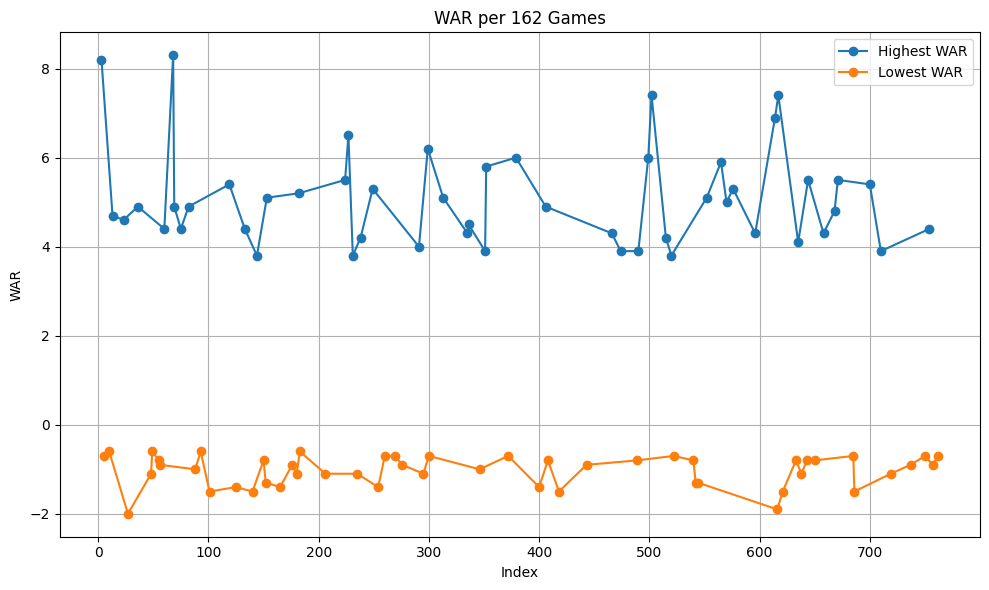

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

# Function to read CSV file with multiple encoding options
def read_csv_with_encodings(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='latin1')
        except UnicodeDecodeError:
            return pd.read_csv(file_path, encoding='iso-8859-1')

try:
    # Read the CSV file
    df = read_csv_with_encodings(csv_file_path)
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Print column names for debug purposes
print(f"Columns in CSV: {df.columns.tolist()}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (WAR)
    war_column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    war_column_16 = pd.to_numeric(war_column_16, errors='coerce').dropna()

    # Extract top 50 and bottom 50 WAR values
    top_50_war = war_column_16.nlargest(50)
    bottom_50_war = war_column_16.nsmallest(50)

    # Sort the indices for plotting purposes
    top_50_war_sorted = top_50_war.sort_index()
    bottom_50_war_sorted = bottom_50_war.sort_index()

    # Create a line graph to visualize the highest and lowest WAR values
    plt.figure(figsize=(10, 6))
    plt.plot(top_50_war_sorted.index, top_50_war_sorted.values, marker='o', linestyle='-', label='Highest WAR')
    plt.plot(bottom_50_war_sorted.index, bottom_50_war_sorted.values, marker='o', linestyle='-', label='Lowest WAR')
    plt.title('WAR per 162 Games')
    plt.xlabel('Index')
    plt.ylabel('WAR')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the data: {e}")


In [20]:
import os
import pandas as pd
import requests

filepath = "WPA_2023.csv"

if os.path.isfile(filepath):
    print("Loading from file")
    try:
        wpa_data = pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        wpa_data = pd.read_csv(filepath, encoding='latin1')
else:
    url = "https://www.baseball-reference.com/leagues/majors/2023-win_probability-batting.shtml"
    print("Loading from the internet")
    
    # Use requests to fetch the data
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML content using pandas
        try:
            wpa_data = pd.read_html(response.text)[0]
            
            # Save the data to a CSV file for future use
            wpa_data.to_csv(filepath, index=False, encoding='utf-8')
        except ValueError:
            print("Failed to parse HTML content")
            wpa_data = None
    else:
        print("Failed to retrieve data from the internet")
        wpa_data = None

if wpa_data is not None:
    print("Data loaded successfully")
    # Display the first few rows of the dataframe
    print(wpa_data.head())
else:
    print("Data not available")


Loading from file
Data loaded successfully
   Rk              Name  Age   PA   Tm  BtRuns  BtWins  Plays  WPA  WPA+  ...  \
0   1        CJ Abrams*   22  614  WSN    -5.0    -0.5    670 -1.0  11.4  ...   
1   2        José Abreu   36  594  HOU   -10.3    -1.0    602 -1.2  10.2  ...   
2   3     Wilyer Abreu*   24   85  BOS     3.6     0.4     89 -0.1   1.4  ...   
3   4  Ronald Acuña Jr.   25  735  ATL    63.5     6.0    843  6.8  17.0  ...   
4   5      Willy Adames   27  638  MIL    -3.0    -0.3    651 -0.7  10.7  ...   

     cWPA-  acLI  cClutch  RE24  REW  boLI RE24/boLI  PHlev AB  \
0   -1.90%  0.26   -0.40%  -3.6 -0.4  0.97       1.4   2.19  1   
1  -11.60%  1.75    0.30%  -2.1 -0.2  1.00     -11.7    NaN  0   
2   -0.20%  0.24   -0.30%   4.8  0.5  0.95       4.4   1.80  6   
3   -4.50%  0.66    0.30%  73.5  6.9  0.95      73.4    NaN  0   
4   -7.00%  1.00   -0.50%  -7.1 -0.7  0.93      -5.6    NaN  0   

   Name-additional  
0        abramcj01  
1        abreujo02  
2        a

We can also get the list of columns out of the data frame

In [ ]:

if war_data is not None:
    print("Data loaded successfully")
    
    # Ensure the 'WAR' column is numeric
    war_data['WAR'] = pd.to_numeric(war_data['WAR'], errors='coerce')
    
    # Sort the data by the 'WAR' column in descending order and get the top 50 scores
    top_50_war = war_data.nlargest(50, 'WAR')
    
    # Display the top 50 WAR scores along with columns 2, 3, 4, and 5
    print(top_50_war.iloc[:, [1, 2, 3, 4, 5, war_data.columns.get_loc('WAR')]])
else:
    print("Data not available")



probly examempt traded players

In [ ]:
if war_data is not None:
    print("Data loaded successfully")
    
    # Ensure the 'WAR' column is numeric
    war_data['WAR'] = pd.to_numeric(war_data['WAR'], errors='coerce')
    
    # Sort the data by the 'WAR' column in ascending order and get the bottom 50 scores
    bottom_50_war = war_data.nsmallest(50, 'WAR')
    
    # Display the bottom 50 WAR scores along with columns 2, 3, 4, and 5
    print(bottom_50_war.iloc[:, [1, 2, 3, 4, 5, war_data.columns.get_loc('WAR')]])
else:
    print("Data not available")

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

Histogram of WAR

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of WAR
plt.figure(figsize=(10, 6))
sns.histplot(war_data['WAR'], bins=30, kde=True)
plt.title('Distribution of WAR')
plt.xlabel('WAR')
plt.ylabel('Frequency')
plt.show()


In [ ]:
if wpa_data is not None:
    plt.figure(figsize=(10, 6))
    sns.histplot(wpa_data['WPA'], bins=30, kde=True)
    plt.title('Distribution of WPA')
    plt.xlabel('WPA')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("wpa_data is not available.")

Series objects are _very_ similar to dictionaries. They have more properties though.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=war_data['WAR'], y=war_data['162WL%'])
plt.title('WAR vs. Winning Percentage')
plt.xlabel('WAR')
plt.ylabel('Winning Percentage')
plt.show()

In [ ]:
# Merge WAR and WPA data on player names or IDs if available
merged_data = pd.merge(war_data, wpa_data, on='Name', how='inner')

# Scatter plot of WAR vs. WPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['WAR'], y=merged_data['WPA'])
plt.title('WAR vs. WPA')
plt.xlabel('WAR')
plt.ylabel('WPA')
plt.show()


In [ ]:
row_one["IPouts"]

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [ ]:
row_one.IPouts

Doing the same thing on a dataframe gives us the whole column

In [ ]:
Pitching.IPouts

In [ ]:
Pitching["IPouts"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

In [ ]:
Pitching.IPouts.hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

In [ ]:
Pitching.FACE_VALUE[Pitching.FACE_VALUE < 200].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [ ]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


We can use boolean indexing to get just the values that are less than 8

In [ ]:
some_numbers[some_numbers < 8]

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [ ]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[p.upper() for p in pets]

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p) == 4]


And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p) == 5]


Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

In [ ]:
upper_bound = 3000
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


Let's see what's under $1000

In [ ]:
upper_bound = 1000
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
penalty_data.head(2)

We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
penalty_data.LEGISLATION.value_counts()

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() 
pdvc[pdvc < 5000].plot(kind="bar");

This pattern keeps repeating itself:

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

In [ ]:
pdvc[pdvc < 3].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

In [ ]:
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

In [ ]:
capped_face_value_data = penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000]

plt.hist(capped_face_value_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [ ]:
capped_face_value_data = penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

In [ ]:
plt.hist(penalty_data.FACE_VALUE, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.FACE_VALUE,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.FACE_VALUE, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"


That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


Which means that we can put those values into our graph title:

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

In [ ]:
income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_